In [ ]:
import pandas
import uproot
    


In [2]:
from yahist import Hist1D,Hist2D
from yahist.utils import plot_stack
import numpy as np
import json

%pylab inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import mplhep
plt.style.use(mplhep.style.CMS)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import awkward

In [2]:
import pyarrow

In [5]:
editDF= awkward.from_parquet('/home/users/iareed/HiggsDNA/SM_22Sep22/scored_dataframes/merged_nominal.parquet')
edit2DF= awkward.from_parquet('/home/users/iareed/HiggsDNA/SM_22Sep22/scored_dataframes/merged_fnuf_down.parquet')


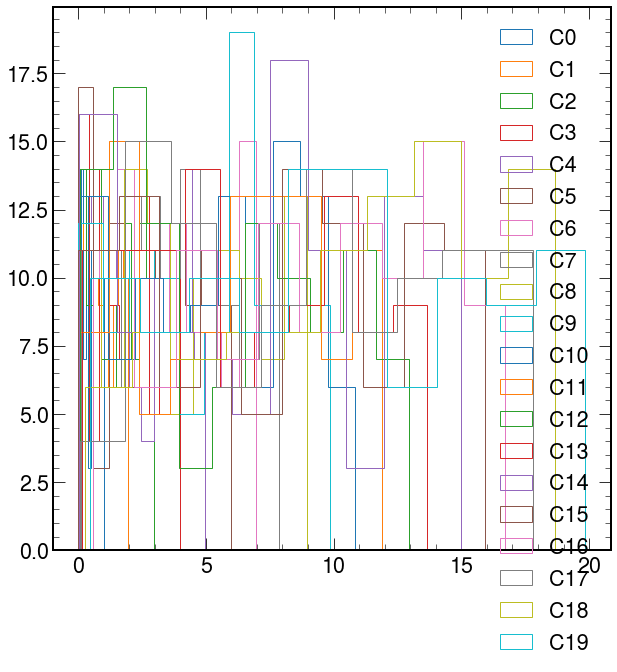

In [9]:
for i in range (20):
    val = np.random.uniform(0,1,100)
    h = Hist1D(val*(i+1),bins=10,label="C%s"%i,color="C%d" % i)
    h.plot()

In [ ]:

events = uproot.lazy({"/ceph/cms/store/user/azecchin/nanoAOD_runII/BSM/TprimeTprime_ttHH_HHtoBBGG_mTp1000_LO_2018_NANO_190722/nanoaod_1.root": "Events"})
eventsI = uproot.open("/ceph/cms/store/user/azecchin/nanoAOD_runII/BSM/TprimeTprime_ttHH_HHtoBBGG_mTp1000_LO_2018_NANO_190722/nanoaod_1.root")
skimms = uproot.open("/ceph/cms/store/user/azecchin/skimNano-TestUL__TEST-SamplesV9/TprimeTprime_ttHH_HHtoBBGG_mTp1000_LO_2018_NANO_190722/skimNano-TestUL_TprimeTprime_ttHH_HHtoBBGG_mTp1000_LO_2018_NANO_190722/220720_122016/0000/tree.root")

In [ ]:
skimms = uproot.open("/ceph/cms/store/user/azecchin/skimNano-TestUL__TEST-SamplesV9/TprimeTprime_ttHH_HHtoBBGG_mTp1000_LO_2018_NANO_290722/skimNano-TestUL_TprimeTprime_ttHH_HHtoBBGG_mTp1000_LO_2018_NANO_290722/220730_211925/0000/bigtree.root")

In [ ]:
# eventsI.classnames()

up_events = skimms["Events"]
# up_events = eventsI["Events"]
# up_events.show("Jet*")

akEvents = up_events.arrays()

# akGenParts = akEvents[[x for x in awkward.fields(akEvents) if "GenPart" in x and "nGenPart" not in x]]


In [ ]:
akGenParts = akEvents[[x for x in awkward.fields(akEvents) if "GenPart" in x and "nGenPart" not in x]]

In [ ]:
for i in range (10):
    if len(akEvents[i]["Jet_pt"]) < 4:
        print (len(akEvents[i]["Jet_pt"]))
        print ((akEvents[i]["nleptons"]))

In [ ]:

higgs = akGenParts["GenPart_pdgId"] == 25 
intermediate =  akGenParts["GenPart_status"]==22
tops = abs(akGenParts["GenPart_pdgId"])==6
akTops = akGenParts[tops]
akHiggs = akGenParts[higgs & intermediate]

bquarks = abs(akGenParts["GenPart_pdgId"]) == 5 
photons = akGenParts["GenPart_pdgId"] == 22 

akBs = akGenParts[bquarks]
akYs = akGenParts[photons]
momBsIdx = akGenParts[bquarks]["GenPart_genPartIdxMother"]
momYsIdx = akGenParts[photons]["GenPart_genPartIdxMother"]
momBs = akGenParts[momBsIdx]
momYs = akGenParts[momYsIdx]

bfromh = momBs["GenPart_pdgId"] == 25
yfromh = momYs["GenPart_pdgId"] == 25
akHb = akBs[bfromh ]
akHy = akYs[yfromh ]

motHHersIdx = akGenParts[higgs & intermediate]["GenPart_genPartIdxMother"]
motHHers = akGenParts[motHHersIdx]
motHHers["GenPart_pdgId"]
moTThersIdx = akGenParts[tops]["GenPart_genPartIdxMother"] 
moTThers = akGenParts[moTThersIdx]

# for i in range (100):
#     print (len(akHiggs[i]))
for i in range(100):
    # if len(motHHers[i]["GenPart_pdgId"]) != 2:
        # print ( (motHHers[i]["GenPart_pdgId"]))
        print (akHiggs[i]["GenPart_pt"] )


In [ ]:
## Calculate diphoton mass 
leadCut = akEvents["Photon_pt"][0]>35
count = 0
for i in range (50100):
    if akEvents[i]["Photon_pt"][0] >35 :
        # akEvents[i]["Photon_pt"][1] >25 :
        count+=1
print( count)

In [ ]:
hist = Hist1D(awkward.flatten(akHb["GenPart_pt"]).to_numpy(allow_missing=True), bins=np.linspace(0,1500,50), label="b-quarks")
hist1 = Hist1D(awkward.flatten(akHy["GenPart_pt"]).to_numpy(allow_missing=True), bins=np.linspace(0,1500,50), label="photons")

hist.plot(log=True)
hist1.plot(log=True)



In [ ]:
hist1.plot(log=True)

In [ ]:
recoPhotons = akEvents[[ x for x in awkward.fields(akEvents) if "Photon_" in x]]
recoPhotons.fields

In [7]:
# df = pandas.read_pickle('../output/higgsDNA_ttHKillED_ttHH_ptmgg_mass.pkl')
df1 = pandas.read_pickle('../output/higgsDNA_ptmgg_mass_REFERENCE.pkl')
# df2 = pandas.read_pickle('../output/higgsDNA_ttHH_ptmgg.pkl')


In [ ]:
akGenParts[1]

In [ ]:
input = "../output/higgsDNA_xchecks_IanREFERENCE.npz"
events = numpy.load(input)["events"]


In [ ]:
# names = events.dtype.names

events['Mx'].dtype
import numpy.lib.recfunctions as rcf
newname_events = rcf.rename_fields(events,{"pt_gg/m_ggjj" : "pt_gg_Mggjj", "pt_jj/m_ggjj":"pt_jj_Mggjj"})
newname_events.dtype.names

In [ ]:
# for key in editDF.keys():
#     print (key)

edit2DF["Mx"]
edit2DF["pt_gg/m_ggjj"]
edit2DF["pt_jj/m_ggjj"]

In [ ]:
ak = awkward.from_arrow(pyarrow.Table.from_pandas(df))

In [ ]:
editDF["Mx"] = editDF["Mx"].astype("float64")

In [ ]:
editDF["pt_gg/m_ggjj"]

In [ ]:
T1 = awkward.Array([[1, 4, 9], [], [16, 25]])
T1

In [ ]:
ak['ttH_killer']
ak['mva_score']

SR1_cut = ak["mva_score"] >= 0.9975
ak_SR1 = ak[SR1_cut]

signalbb = ak_SR1["process_id"] ==11
signaltt = ak_SR1["process_id"] ==12 
signalww = ak_SR1["process_id"] ==13
signal_filter =  signalbb | signaltt | signalww
signal = ak_SR1[signal_filter]
bkg_filter = ak_SR1["process_id"] ==10
bkg = ak_SR1[bkg_filter]
nonres_filter= ~signal_filter & ~bkg_filter

In [ ]:
nonres = ak_SR1[nonres_filter]
print(sum(nonres_filter) , " " , sum(bkg_filter), " " , sum(signal_filter) , " " , len(ak_SR1)  )

In [ ]:
109529  + 3555 +  436353 ==  549437


signal["weight_central"]

pre_signalbb = ak["process_id"] ==11
pre_signaltt = ak["process_id"] ==12 
pre_signalww = ak["process_id"] ==13
pre_signal_filter = pre_signalbb | pre_signaltt | pre_signalww
pre_bkg_filter = ak["process_id"] ==10
pre_nonres_filter= ~pre_signal_filter & ~pre_bkg_filter

pre_signal = ak[pre_signal_filter]
pre_bkg = ak[pre_bkg_filter]
pre_nonres = ak[pre_nonres_filter]



In [ ]:
print(len(pre_signal), " ",len(signal))

In [ ]:
hist = Hist1D( signal["ttH_killer"].to_numpy(allow_missing=True),weights=signal["weight_central"] , bins=np.linspace(0,1,50), label="ttHH")
hist2 = Hist1D( bkg["ttH_killer"].to_numpy(allow_missing=True),weights=bkg["weight_central"] , bins=np.linspace(0,1,50), label="ttH")
hist3 = Hist1D( nonres["ttH_killer"].to_numpy(allow_missing=True),weights=nonres["weight_central"] , bins=np.linspace(0,1,50), label="other")

In [ ]:
hist.plot(log=True)
hist2.plot(log=True)
hist3.plot(log=True)

In [ ]:
pre_hist = Hist1D( pre_signal["ttH_killer"].to_numpy(allow_missing=True),weights=pre_signal["weight_central"] , bins=np.linspace(0,1,50),label="ttHH")
pre_hist2 = Hist1D( pre_bkg["ttH_killer"].to_numpy(allow_missing=True),weights=pre_bkg["weight_central"] , bins=np.linspace(0,1,50),label="ttH")
pre_hist3 = Hist1D( pre_nonres["ttH_killer"].to_numpy(allow_missing=True),weights=pre_nonres["weight_central"] , bins=np.linspace(0,1,50),label="other")

pre_hist.normalize().plot(log=True)
pre_hist2.normalize().plot(log=True)
pre_hist3.normalize().plot(log=True)



In [ ]:
pre_hist.plot(log=True)
pre_hist2.plot(log=True)
pre_hist3.plot(log=True)


In [ ]:
akNew = awkward.from_arrow(pyarrow.Table.from_pandas(df1))
akOld = awkward.from_arrow(pyarrow.Table.from_pandas(df2))

len(akNew)

In [ ]:
pre_new = Hist1D( akNew["mva_score"].to_numpy(allow_missing=True),weights=akNew["weight_central"] , bins=np.linspace(0,1,50),label="New")
pre_old = Hist1D( akOld ["mva_score"].to_numpy(allow_missing=True),weights=akOld["weight_central"] , bins=np.linspace(0,1,50),label="Old")

In [ ]:
pre_new.plot(log=True)
pre_old.plot(log=True)

In [ ]:
df = awkward.from_parquet("/home/users/azecchin/Analysis/HiggsDNA/output/heft_FF_input/merged_nominal.parquet")

In [ ]:
dataID = df.process_id == 0
data = df[dataID]

data.fields

print (awkward.sum(data.bdt_score > 0.8) )

In [ ]:
dataMVA = Hist1D( data["bdt_score"].to_numpy(allow_missing=True),weights=data["weight_central"] , bins=np.linspace(0,1,50))
dataMVA.plot(log=True)

In [ ]:
import glob

files_ttH = glob.glob("/home/users/azecchin/Analysis/HiggsDNA/output/heft_FF_syst/ttH_M125_2018*/merged_nominal.parquet")
files_ttHnew = glob.glob("/home/users/azecchin/Analysis/HiggsDNA/output/heft_presel_FF_syst_condor/ttH_M125_2018*/merged_nominal.parquet")
files_ggH = glob.glob("/home/users/azecchin/Analysis/HiggsDNA/output/heft_FF_syst/ggH_M125_2018*/merged_nominal.parquet")
files_VH = glob.glob("/home/users/azecchin/Analysis/HiggsDNA/output/heft_FF_syst/VH_M125_2018*/merged_nominal.parquet")
files_VBFH = glob.glob("/home/users/azecchin/Analysis/HiggsDNA/output/heft_FF_syst/VBFH_M125_2018*/merged_nominal.parquet")
files_Data = glob.glob("/home/users/azecchin/Analysis/HiggsDNA/output/heft_FF_syst/Data_*/merged_nominal.parquet")

f_ttH = awkward.from_parquet(files_ttH)
f_ttHnew = awkward.from_parquet(files_ttHnew)
f_ggH = awkward.from_parquet(files_ggH)
f_VH = awkward.from_parquet(files_VH)
f_VBFH = awkward.from_parquet(files_VBFH)
f_Data = awkward.from_parquet(files_Data)

for year in f_Data["year"]:
  print (year,type(year) )
  if year==b'2016UL_pre' :
    print ("taht was easy")

In [ ]:
print ("old {} new {}".format(len(f_ttH),len(f_ttHnew)))

for f in f_ttH.fields:
    if f not in f_ttHnew.fields: print("{} not in new df".format(f))

for f in f_ttHnew.fields:
    if f not in f_ttH.fields: print("{} not in old df".format(f))

In [ ]:
print(len(f_ttH))
print(len(f_ggH))
print(len(f_VH))
print(len(f_VBFH))

print()

In [ ]:
print (len(f_Data))
print (awkward.sum(f_Data["bdt_score"]>.9903))
sr2l = f_Data["bdt_score"]>0.9669743 
sr2h = f_Data["bdt_score"]<=.9903
print (awkward.sum(sr2l & sr2h))

srs = (f_Data["bdt_score"]>.9903) ^ (sr2l & sr2h)
srData = f_Data[srs]
# print (awkward.sum(f_Data["Diphoton_mass"]) )

print("ttH events in SR1 ",awkward.sum(f_ttH["pass_sr_0"]) )
print("ttH events in SR2 ",awkward.sum(f_ttH["pass_sr_1"]) )
print(" ggH events in SR1 ",awkward.sum(f_ggH["pass_sr_0"]) )
print(" ggH events in SR2 ",awkward.sum(f_ggH["pass_sr_1"]) )
print("VBFH events in SR1 ",awkward.sum(f_VBFH["pass_sr_0"]) )
print("VBFH events in SR2 ",awkward.sum(f_VBFH["pass_sr_1"]) )
print(" VH events in SR1 ",awkward.sum(f_VH["pass_sr_0"]) )
print(" VH events in SR2 ",awkward.sum(f_VH["pass_sr_1"]) )


In [ ]:
f_IanData = awkward.from_parquet("/home/users/iareed/HggAnalysisDev/MVAs/ttHH_02Aug22/merged_nominal.parquet")
f_IanData.fields

In [ ]:
ianData = f_IanData[f_IanData["process_id"]==0]
ian_ttHH = f_IanData[f_IanData["process_id"]==2]
ian_ttH = f_IanData[f_IanData["process_id"]==1]
ian_ggH = f_IanData[f_IanData["process_id"]==5]
ian_VBFH = f_IanData[f_IanData["process_id"]==6]
ian_VH = f_IanData[f_IanData["process_id"]==7]
Sr2l = ianData["bdt_score"]>0.9669743 
Sr2h = ianData["bdt_score"]<=.9903
Srs = (ianData["bdt_score"]>.9903 ) ^ (Sr2l & Sr2h) 
# print(awkward.sum(ianData["bdt_score"]>.9903))


# print("My  ttH events in SR1 ",awkward.sum(f_ttH["pass_sr_0"]) )
# print("My  ttH events in SR2 ",awkward.sum(f_ttH["pass_sr_1"]) )
# print("My  ggH events in SR1 ",awkward.sum(f_ggH["pass_sr_0"]) )
# print("My  ggH events in SR2 ",awkward.sum(f_ggH["pass_sr_1"]) )
# print("My  VBFH events in SR1 ",awkward.sum(f_VBFH["pass_sr_0"]) )
# print("My  VBFH events in SR2 ",awkward.sum(f_VBFH["pass_sr_1"]) )
# print("My  VH events in SR1 ",awkward.sum(f_VH["pass_sr_0"]) )
# print("My  VH events in SR2 ",awkward.sum(f_VH["pass_sr_1"]) )
# print("Ian VH events in SR1 ",awkward.sum(ian_VH["bdt_score"]>.9903) )
# print("Ian ttH events in SR1 ",awkward.sum(ian_ttH["bdt_score"]>.9903 ) )
# print("Ian ggH events in SR1 ",awkward.sum(ian_ggH["bdt_score"]>.9903 ) )
# print("Ian VBFH events in SR1 ",awkward.sum(ian_VBFH["bdt_score"]>.9903) )
# print("Ian VH events in SR2 ",awkward.sum((ian_VH["bdt_score"]>0.9669743) & (ian_VH["bdt_score"]<=.9903)) )
print("Ian ttH events in SR2 ",awkward.sum((ian_ttH["bdt_score"]>0.9669743) & (ian_ttH["bdt_score"]<=.9903)& (ian_ttH["year"]==b'2017')& (ian_ttH["event"] % 2 ==1)) )
# print("Ian ggH events in SR2 ",awkward.sum((ian_ggH["bdt_score"]>0.9669743) & (ian_ggH["bdt_score"]<=.9903) & (ian_ggH["year"]==b'2017')) )
# print("Ian VBFH events in SR2 ",awkward.sum((ian_VBFH["bdt_score"]>0.9669743) & (ian_VBFH["bdt_score"]<=.9903)) )



In [ ]:
awkward.sum(f_IanData["process_id"]==0)

print("Ian Data events in SR1 ",awkward.sum((ianData["mva_score"]>.9903) &(( ianData["Diphoton_mass"] < 120 ) | ( ianData["Diphoton_mass"] > 130 ) )) )
print("Ian Data events in SR2 ",awkward.sum(((ianData["mva_score"]>0.9669743) & (ianData["mva_score"]<=.9903)) &(( ianData["Diphoton_mass"] < 120 ) | ( ianData["Diphoton_mass"] > 130 ) ))) 

In [5]:
df1 = pandas.read_pickle('../output/higgsDNA_ptmgg_mass_REFERENCE.pkl')
df1

,Diphoton_mass,Diphoton_pt,Diphoton_eta,Diphoton_phi,LeadPhoton_pt,LeadPhoton_eta,LeadPhoton_phi,LeadPhoton_mass,LeadPhoton_mvaID,LeadPhoton_genPartFlav,...,weight_central_initial,weight_central,process_id,year,Diphoton_pt_mgg,LeadPhoton_pt_mgg,SubleadPhoton_pt_mgg,Diphoton_dR,train_label,mva_score
0,116.560341,240.091324,1.021229,1.018087,158.918732,1.208008,1.249756,0.000005,0.886230,1.0,...,0.1,1.090395e-02,0.0,2016.0,2.059803,1.363403,0.796884,0.954943,1.0,0.014991
1,127.762688,23.907368,-3.346912,-1.437658,64.152931,-1.302979,-2.458984,0.000000,-0.198730,1.0,...,0.1,1.090395e-02,0.0,2016.0,0.187123,0.502126,0.434750,2.886157,1.0,0.014332
2,119.721916,42.215214,0.562367,-1.726318,78.998856,0.492859,-1.854004,0.000001,0.579102,1.0,...,0.1,1.090395e-02,0.0,2016.0,0.352611,0.659853,0.313347,3.128716,2.0,0.007364
3,111.840828,171.108459,-0.428957,-1.770930,146.390793,-0.244049,-2.077637,0.000003,0.728027,1.0,...,0.1,1.090395e-02,0.0,2016.0,1.529928,1.308921,0.485541,1.329772,0.0,0.010002
4,114.180603,89.192184,1.509473,-0.601818,111.640221,1.121582,-0.358093,-0.000003,-0.051025,1.0,...,0.5,5.451973e-02,0.0,2016.0,0.781150,0.977751,0.289477,2.435569,1.0,0.002986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7623845,125.210663,114.239922,-1.733295,0.087153,101.199348,-0.956787,-0.271912,-0.000004,0.044769,1.0,...,1.0,1.334711e-08,0.0,2018.0,0.912382,0.808233,0.323887,1.962965,2.0,0.989649
7623846,126.738045,159.489960,-0.554244,-0.451131,136.528610,-0.786133,-0.625366,0.000002,0.739746,1.0,...,1.0,1.334711e-08,0.0,2018.0,1.258422,1.077250,0.271797,1.746352,2.0,0.998110
7623847,130.761826,203.803345,1.934247,0.008949,162.583359,1.854004,0.373474,0.000009,-0.476318,1.0,...,1.0,1.334711e-08,0.0,2018.0,1.558584,1.243355,0.595006,1.232390,2.0,0.998415
7623848,123.503609,264.168701,-0.565566,-2.749064,151.301788,-0.664917,-2.359863,0.000002,0.959961,1.0,...,1.0,1.334711e-08,0.0,2018.0,2.138955,1.225080,1.107751,0.879391,1.0,0.992932


In [6]:
df2 = pandas.read_parquet("../output/ttHH_spike.parquet")

In [7]:
df2

,Diphoton_mass,Diphoton_pt,Diphoton_eta,Diphoton_phi,Diphoton_dR,Diphoton_pt_mgg,Diphoton_dPhi,Diphoton_helicity,LeadPhoton_pt,LeadPhoton_eta,...,Subleadjet_btag,Dijet_dR,Dijet_pt,Dijet_pt_mjj,Dijet_eta,Dijet_phi,Dijet_mass,Dijet_score,train_label,mva_score
0,116.083366,23.291407,1.494859,0.426998,3.030688,0.200644,2.865113,0.427019,61.989712,-0.009026,...,-999.000000,0.000000,1998.000000,NaN,0.000000,-3.115129,NaN,0.686831,1.0,0.000631
1,109.222969,5.161402,-5.321397,-0.867020,3.056340,0.047256,3.052368,0.075973,55.985550,-2.342285,...,-999.000000,0.000000,1998.000000,NaN,0.000000,-3.115129,NaN,0.686831,2.0,0.000840
2,106.610428,13.541194,-2.700079,-1.369445,3.560207,0.127016,2.889142,0.751024,39.297939,0.085251,...,-999.000000,0.000000,1998.000000,NaN,0.000000,-3.115129,NaN,0.686831,2.0,0.004716
3,126.329094,12.169449,1.474873,1.779675,3.215365,0.096331,2.901838,0.602736,51.156189,0.885376,...,-999.000000,0.000000,1998.000000,NaN,0.000000,-3.115129,NaN,0.686831,1.0,0.000628
4,161.101334,143.106934,1.565119,-1.847887,2.081761,0.888304,1.057617,0.621170,117.284416,0.655640,...,-999.000000,0.000000,1998.000000,NaN,0.000000,-3.115129,NaN,0.686831,1.0,0.005106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930265,155.067093,109.832466,0.427286,-2.608109,2.163024,0.708290,-1.166486,0.882142,66.663269,1.153076,...,0.535645,0.826500,703.473157,3.236101,-1.811819,0.564929,217.382913,0.889987,0.0,0.849408
5930266,103.783783,198.138519,-0.267564,-2.917292,1.242680,1.909147,-1.233643,0.004608,179.076950,-0.207947,...,0.869141,1.765989,122.639949,1.031762,-2.433912,-0.843446,118.864558,0.943741,2.0,0.977949
5930267,114.274071,860.308960,0.421430,2.053888,0.307006,7.528471,0.290771,0.438777,653.868225,0.442200,...,0.757324,1.331802,270.183150,1.249109,0.838049,1.644695,216.300658,0.816578,0.0,0.994209
5930268,149.989746,388.467133,-0.345601,1.478436,1.098311,2.589958,-0.077393,0.852276,338.703949,-0.481689,...,0.997559,0.982109,452.207289,2.129646,0.504247,-2.820209,212.339207,0.910596,1.0,0.984530


In [13]:
print ("old columns")
for column in df1.columns:
    print (column)

old columns
Diphoton_mass
Diphoton_pt
Diphoton_eta
Diphoton_phi
LeadPhoton_pt
LeadPhoton_eta
LeadPhoton_phi
LeadPhoton_mass
LeadPhoton_mvaID
LeadPhoton_genPartFlav
LeadPhoton_pixelSeed
SubleadPhoton_pt
SubleadPhoton_eta
SubleadPhoton_phi
SubleadPhoton_mass
SubleadPhoton_mvaID
SubleadPhoton_genPartFlav
SubleadPhoton_pixelSeed
MET_pt
MET_phi
MET_covXX
MET_covXY
MET_covYY
jet_1_pt
jet_1_eta
jet_1_phi
jet_1_mass
jet_1_btagDeepFlavB
jet_2_pt
jet_2_eta
jet_2_phi
jet_2_mass
jet_2_btagDeepFlavB
jet_3_pt
jet_3_eta
jet_3_phi
jet_3_mass
jet_3_btagDeepFlavB
jet_4_pt
jet_4_eta
jet_4_phi
jet_4_mass
jet_4_btagDeepFlavB
jet_5_pt
jet_5_eta
jet_5_phi
jet_5_mass
jet_5_btagDeepFlavB
jet_6_pt
jet_6_eta
jet_6_phi
jet_6_mass
jet_6_btagDeepFlavB
jet_7_pt
jet_7_eta
jet_7_phi
jet_7_mass
jet_7_btagDeepFlavB
jet_8_pt
jet_8_eta
jet_8_phi
jet_8_mass
jet_8_btagDeepFlavB
bjet_1_btagDeepFlavB
bjet_2_btagDeepFlavB
bjet_3_btagDeepFlavB
bjet_4_btagDeepFlavB
bjet_5_btagDeepFlavB
bjet_6_btagDeepFlavB
bjet_7_btagDeepFlavB
b

In [14]:
print ("new columns")
for column in df2.columns:
    print (column)

new columns
Diphoton_mass
Diphoton_pt
Diphoton_eta
Diphoton_phi
Diphoton_dR
Diphoton_pt_mgg
Diphoton_dPhi
Diphoton_helicity
LeadPhoton_pt
LeadPhoton_eta
LeadPhoton_phi
LeadPhoton_mass
LeadPhoton_mvaID
LeadPhoton_pixelSeed
LeadPhoton_pt_mgg
SubleadPhoton_pt
SubleadPhoton_eta
SubleadPhoton_phi
SubleadPhoton_mass
SubleadPhoton_mvaID
SubleadPhoton_pixelSeed
SubleadPhoton_pt_mgg
jet_1_pt
jet_1_eta
jet_1_phi
jet_1_mass
jet_1_btagDeepFlavB
jet_1_bRegCorr
jet_2_pt
jet_2_eta
jet_2_phi
jet_2_mass
jet_2_btagDeepFlavB
jet_2_bRegCorr
jet_3_pt
jet_3_eta
jet_3_phi
jet_3_mass
jet_3_btagDeepFlavB
jet_3_bRegCorr
jet_4_pt
jet_4_eta
jet_4_phi
jet_4_mass
jet_4_btagDeepFlavB
jet_4_bRegCorr
jet_5_pt
jet_5_eta
jet_5_phi
jet_5_mass
jet_5_btagDeepFlavB
jet_5_bRegCorr
jet_6_pt
jet_6_eta
jet_6_phi
jet_6_mass
jet_6_btagDeepFlavB
jet_6_bRegCorr
b_jet_1_btagDeepFlavB
b_jet_2_btagDeepFlavB
b_jet_3_btagDeepFlavB
b_jet_4_btagDeepFlavB
b_jet_1_jet_idx
b_jet_2_jet_idx
b_jet_3_jet_idx
b_jet_4_jet_idx
lepton_1_pt
lepton_1_

In [8]:
df1.process_id.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [9]:
df2.process_id.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22.])

In [3]:
import pyarrow.parquet as pq


In [4]:
table1 = pq.read_table('../output/merged_nominal.parquet')
table2 = pq.read_table('../../../HiggsDNA/output/heft_presel_FF_syst_condor_MVAscore/merged_nominal.parquet')

assert table1.equals(table2)

In [ ]:
import xgboost    

: 